# 1.Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data.csv


# 2.Load the file

In [ ]:
inc_data = pd.read_csv('Inc_Exp_Data.csv')

In [ ]:
inc_data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
inc_data.shape

(50, 7)

Datasets have 50 rows and 7 columns

In [ ]:
inc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [ ]:
# Checking for missing values

inc_data.isnull().sum()#.mean()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

No missing Values

In [ ]:
#Convert Data types to categorical variables.

inc_data['Highest_Qualified_Member'] = inc_data['Highest_Qualified_Member'].astype('category')

In [ ]:
inc_data['Highest_Qualified_Member'].dtypes

CategoricalDtype(categories=['Graduate', 'Illiterate', 'Post-Graduate', 'Professional',
                  'Under-Graduate'],
                 ordered=False)

In [ ]:
inc_data['Highest_Qualified_Member'].cat.codes.value_counts()


0    19
4    10
3    10
2     6
1     5
dtype: int64

# 3.Analyze the data (Statistical Summary)

In [ ]:
inc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


The average Monthy expense is 18,818
and minimum monthly expense is 2000

# 4.What is the Mean Expense of a Household?

In [ ]:
my_mean = inc_data['Mthly_HH_Expense'].mean()
print('The Mean Expense of a Household is:', my_mean)

The Mean Expense of a Household is: 18818.0


# 5.What is the Median Household Expense?

In [ ]:
median_exp = inc_data['Mthly_HH_Expense'].median()
print('The Median Expense of a Household is:', median_exp)


The Median Expense of a Household is: 15500.0


# 6.What is the Monthly Expense for most of the Households?

In [ ]:
myhg = inc_data['Mthly_HH_Expense'].value_counts()
myhg

25000    8
20000    6
10000    5
8000     3
12000    3
15000    3
9000     3
40000    2
50000    2
13000    1
22000    1
48000    1
45000    1
7000     1
30000    1
4500     1
16000    1
2000     1
12300    1
19000    1
5000     1
10500    1
6600     1
18000    1
Name: Mthly_HH_Expense, dtype: int64

In [ ]:
monthly_exp = pd.crosstab(index = inc_data["Mthly_HH_Expense"], 
                          columns="count")

monthly_exp.reset_index(inplace=True)

monthly_exp[monthly_exp['count'] == inc_data['Mthly_HH_Expense'].value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


In [ ]:
#or simple 
# inc_data['Mthly_HH_Expense'].mode()

0    25000
dtype: int64

In [ ]:
inc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.00,"41,558.00","26,097.91","5,000.00","23,550.00","35,000.00","50,375.00","100,000.00"
Mthly_HH_Expense,50.00,"18,818.00","12,090.22","2,000.00","10,000.00","15,500.00","25,000.00","50,000.00"
No_of_Fly_Members,50.00,4.06,1.52,1.00,3.00,4.00,5.00,7.00
Emi_or_Rent_Amt,50.00,"3,060.00","6,241.43",0.00,0.00,0.00,"3,500.00","35,000.00"
Annual_HH_Income,50.00,"490,019.04","320,135.79","64,200.00","258,750.00","447,420.00","594,720.00","1,404,000.00"
No_of_Earning_Members,50.00,1.46,0.73,1.00,1.00,1.00,2.00,4.00


# 7.Plot the Histogram to count the Highest qualified member

In [ ]:
inc_data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
inc_data.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

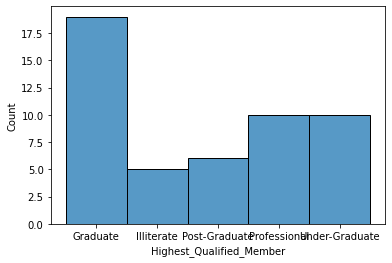

In [ ]:
sns.histplot(data= inc_data['Highest_Qualified_Member'])

# 8.Calculate IQR(difference between 75% and 25% quartile) for Monthly Household Income and Expense

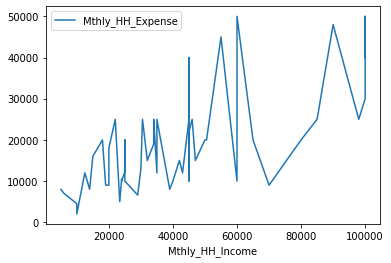

In [ ]:
inc_data.plot(x="Mthly_HH_Income", y="Mthly_HH_Expense")
plt.show()

In [ ]:
IQR_i = inc_data["Mthly_HH_Income"].quantile(0.75) - inc_data["Mthly_HH_Income"].quantile(0.25)

print("IQR for Monthly Household Income",IQR_i)
print()

IQR for Monthly Household Income 26825.0



In [ ]:
IQR_e = inc_data["Mthly_HH_Expense"].quantile(0.75) - inc_data["Mthly_HH_Expense"].quantile(0.25)

print("IQR for Monthly Household Expense",IQR_e)

IQR for Monthly Household Expense 15000.0


# 9.Calculate Standard Deviation for first 4 columns.

In [ ]:
inc_data.iloc[:, 0:4].std()

Mthly_HH_Income     26,097.91
Mthly_HH_Expense    12,090.22
No_of_Fly_Members        1.52
Emi_or_Rent_Amt      6,241.43
dtype: float64

In [ ]:
# 0r we can do 
# pd.DataFrame(inc_data.iloc[:,0:4].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,"26,097.91","12,090.22",1.52,"6,241.43","320,135.79"


# 10.Calculate Variance for first 3 columns.

In [ ]:
inc_data.shape

(50, 7)

In [ ]:
inc_data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
inc_data.iloc[:, 0:3].var()

Mthly_HH_Income     681,100,853.06
Mthly_HH_Expense    146,173,342.86
No_of_Fly_Members             2.30
dtype: float64

# 11.Calculate the count of Highest qualified member.

In [ ]:
inc_data.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [ ]:
inc_data['Highest_Qualified_Member'].value_counts()

Graduate          19
Under-Graduate    10
Professional      10
Post-Graduate      6
Illiterate         5
Name: Highest_Qualified_Member, dtype: int64

# 12.Plot the Histogram to count the No_of_Earning_Members

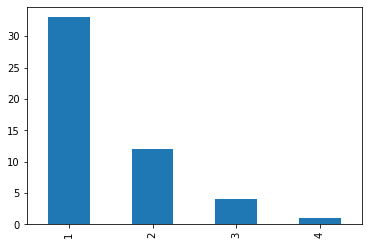

In [ ]:
inc_data['No_of_Earning_Members'].value_counts().plot(kind='bar')